## Load the data again if needed

If you don't have the data from the previous lesson loaded anymore, go ahead and reload it now. You can use the following code:

In [ ]:
# To keep the page organized, do all imports here
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# Use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [ ]:
students_df = pd.read_sql_table('studentsperformance', con=engine)

# Remove the connection
engine.dispose()

students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As before, you can use the techniques from the previous lessons to explore this dataset so that you understand the basic data schema.

# Customizing seaborn plots

Like with Excel, seaborn includes many options for customizing a chart. Look at the most common options, using your grouped scatter plot from earlier as an example. 

## Seaborn styles

Seaborn comes with a handful of figure styles which can be loaded by calling `sns.set_style()`. Then all following plots will be charted based on the theme.

To see how this works, try using the `white` theme on the scatter plot. 

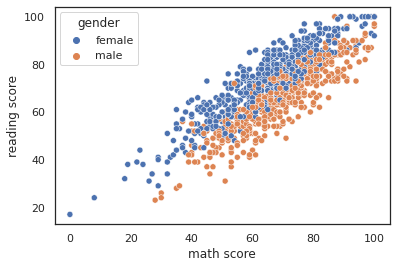

In [ ]:
sns.set_style("white")
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)

The plot now uses a simple white background.

To experiment with the other seaborn themes, check out the [seaborn documentation](https://seaborn.pydata.org/tutorial/aesthetics.html).

Seaborn also comes with several methods for controlling the *aesthetics* or visual elements of a plot. Again, to learn about the entire suite, check out [official seaborn docs](https://seaborn.pydata.org/tutorial.html). You'll focus on one of the most common, the `despine()` method. This will remove the upper and right borders from the plot.

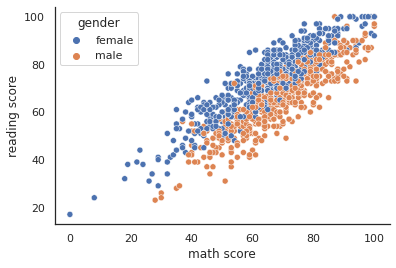

In [ ]:
# Get rid of the box
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
sns.despine()

Remember that all seaborn plots will be charted using the current theme until specified otherwise. Use `sns.set()` to restore default seaborn settings. 

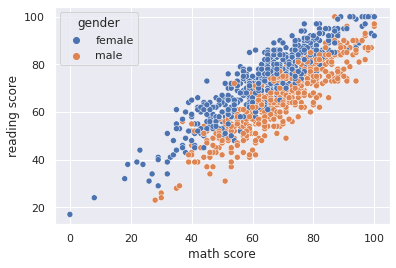

In [ ]:
sns.set()
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)

## Customizing seaborn plots with pyplot

At the beginning of the last lesson, it was mentioned that seaborn is based on Matplotlib. This means that you can include Matplotlib functionalities directly with seaborn plots. Explore this using the pyplot series of functions from `matplotlib.pyplot`. The standard alias for this collection is `plt`.

Like seaborn, pyplot contains too many functions to cover here; for the complete list, check out [the documentation](https://matplotlib.org/users/pyplot_tutorial.html). 

Among the most common uses of pyplot with seaborn is to add custom axis labels and a plot title. This can be done with the methods `xlabel()`, `ylabel()`, and `title()`, respectively. Call `plt.show()` to print the results of the plot. These methods will be executed with your seaborn scatter plot and compiled onto one plot. 

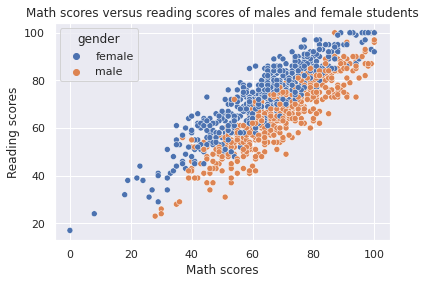

In [ ]:
import matplotlib.pyplot as plt

# Custom labels
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

The new plot feels a little cramped with the title. You can resize the plot using the `figure()` method from pyplot. Call this method *before* making your seaborn plot. 

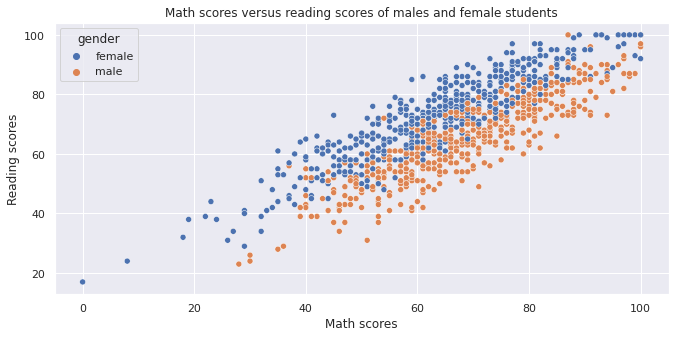

In [ ]:
# Make a wider plot

plt.figure(figsize = (11,5))
sns.scatterplot(x="math score", y="reading score", hue="gender", data=students_df)
plt.xlabel('Math scores')
plt.ylabel('Reading scores')
plt.title('Math scores versus reading scores of males and female students')
plt.show()

This method can also be helpful for resizing plots where axis labels are hard to read.